In [7]:
import numpy as np
import pandas as pd
import sklearn.metrics
from IPython.core.pylabtools import figsize
from fontTools.varLib.instancer import AxisLimits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv(r'D:\ML\Finding_defect\Files\C\train.csv')
df_test = pd.read_csv(r'D:\ML\Finding_defect\Files\C\test.csv')

In [9]:
df_train.drop(df_train.columns[0:3], axis =1, inplace= True)
df_train

,ns,nd,nf,entrophy,la,ld,lt,fix,ndev,age,nuc,exp,rexp,sexp,bug
0,1,1,2,0.32016,28,1,3377,1,1,0.183495,2,1,1.000000,2,0
1,1,1,1,0.00000,1,1,341,0,1,0.003368,2,1,0.996643,2,0
2,1,1,1,0.00000,1,1,3070,0,2,0.007373,3,0,0.000000,1,0
3,1,1,1,0.00000,4,2,341,0,2,0.905683,3,1,1.000000,2,1
4,1,1,1,0.00000,1,1,3063,1,2,0.997164,4,2,1.500710,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114374,1,1,1,0.00000,11,11,844,0,9,203.858808,88,0,0.000000,1,0
114375,1,1,1,0.00000,4,2,598,0,15,64.740243,42,1,1.000000,1,0
114376,1,1,1,0.00000,2,2,1036,0,6,29.489375,34,349,4.600444,61,0
114377,1,1,1,0.00000,2,2,1044,0,10,40.960174,22,350,5.600444,61,0


In [10]:
df_train.describe()

,ns,nd,nf,entrophy,la,ld,lt,fix,ndev,age,nuc,exp,rexp,sexp,bug
count,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000
mean,1.092779,1.380437,2.281494,0.466353,72.340622,106.326572,3176.104014,0.281162,16.102300,43.656656,258.114086,1764.632546,24.890147,105.757412,0.474388
std,0.436587,2.744294,10.997604,3.606354,1629.416882,5006.429345,11457.141210,0.449568,17.805401,144.615691,1105.516569,2257.858844,41.199174,149.441897,0.499346
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,668.000000,0.000000,4.000000,0.595379,27.000000,163.000000,5.399529,15.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,6.000000,3.000000,1529.000000,0.000000,10.000000,5.266875,88.000000,821.000000,13.414323,49.000000,0.000000
75%,1.000000,1.000000,2.000000,0.405224,25.000000,13.000000,3335.000000,1.000000,22.000000,30.088339,251.000000,2512.000000,28.796882,132.000000,1.000000
max,17.000000,132.000000,870.000000,294.165830,255240.000000,1000000.000000,1000000.000000,1.000000,403.000000,5850.809086,75913.000000,12189.000000,1504.158111,1708.000000,1.000000


[]

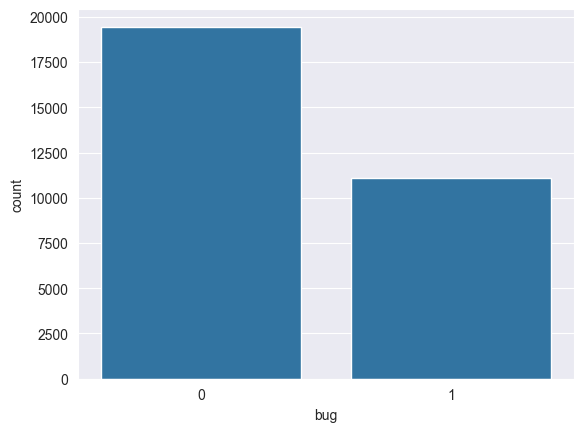

In [11]:
sns.countplot(data=df_test, x = 'bug')
plt.fill(data = df_train, color = 'white')

Text(0.5, 1.0, 'Bug')

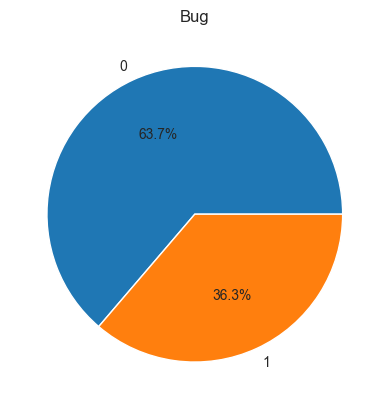

In [12]:
x = (df_test['bug'] == 1).value_counts(normalize = True) * 100
label = [0 , 1]
plt.pie(x, labels = label, autopct='%1.1f%%')
plt.title('Bug')

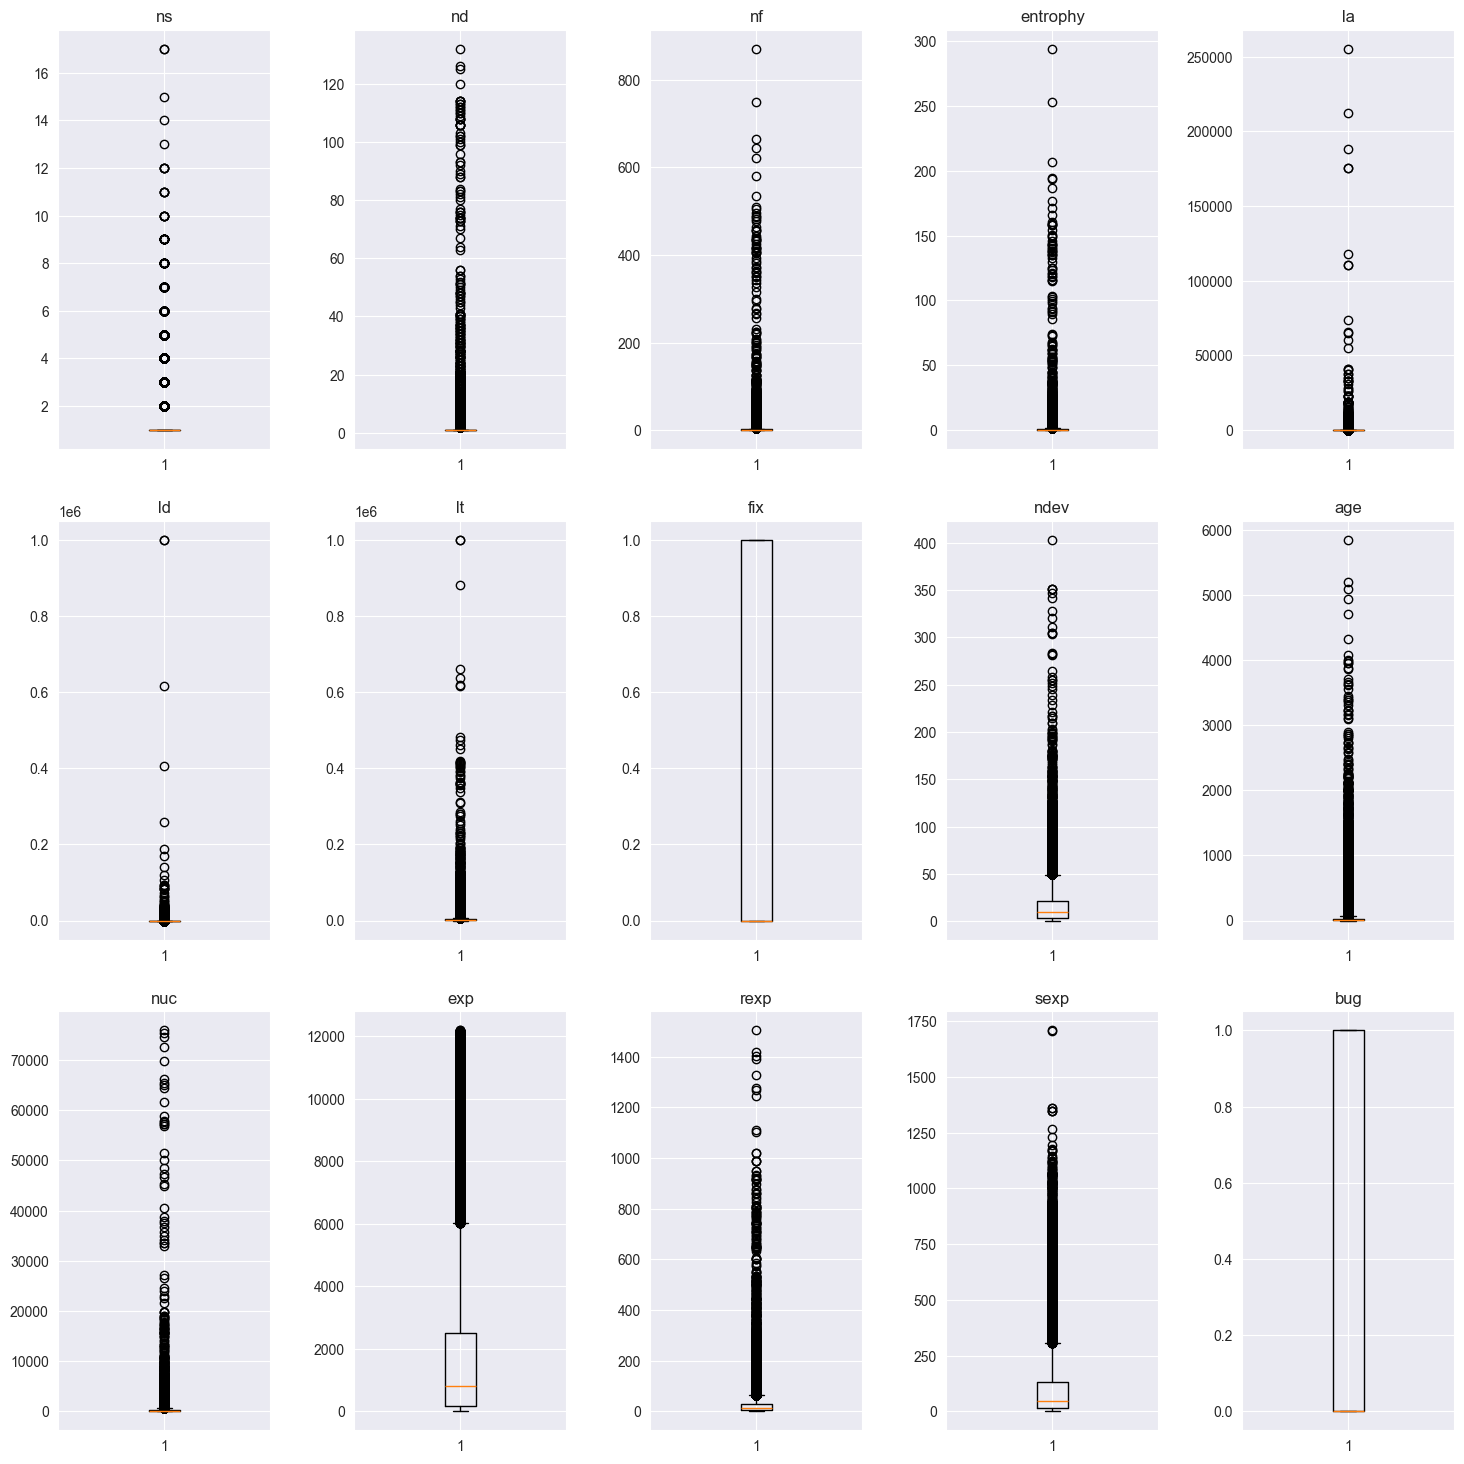

In [8]:
fig, ax = plt.subplots(3, 5,figsize = (15,15))
ax[0, 0].boxplot(df_train['ns'])
ax[0, 0].set_title('ns')

ax[0, 1].boxplot(df_train['nd'])
ax[0, 1].set_title('nd')

ax[0, 2].boxplot(df_train['nf'])
ax[0, 2].set_title('nf')

ax[0, 3].boxplot(df_train['entrophy'])
ax[0, 3].set_title('entrophy')

ax[0, 4].boxplot(df_train['la'])
ax[0, 4].set_title('la')

ax[1, 0].boxplot(df_train['ld'])
ax[1, 0].set_title('ld')

ax[1, 1].boxplot(df_train['lt'])
ax[1, 1].set_title('lt')

ax[1, 2].boxplot(df_train['fix'])
ax[1, 2].set_title('fix')

ax[1, 3].boxplot(df_train['ndev'])
ax[1, 3].set_title('ndev')

ax[1, 4].boxplot(df_train['age'])
ax[1, 4].set_title('age')

ax[2, 0].boxplot(df_train['nuc'])
ax[2, 0].set_title('nuc')

ax[2, 1].boxplot(df_train['exp'])
ax[2, 1].set_title('exp')

ax[2, 2].boxplot(df_train['rexp'])
ax[2, 2].set_title('rexp')

ax[2, 3].boxplot(df_train['sexp'])
ax[2, 3].set_title('sexp')

ax[2, 4].boxplot(df_train['bug'])
ax[2, 4].set_title('bug')

plt.tight_layout(pad = 2)

In [9]:
df_train.describe()

,ns,nd,nf,entrophy,la,ld,lt,fix,ndev,age,nuc,exp,rexp,sexp,bug
count,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000,114379.000000
mean,1.092779,1.380437,2.281494,0.466353,72.340622,106.326572,3176.104014,0.281162,16.102300,43.656656,258.114086,1764.632546,24.890147,105.757412,0.474388
std,0.436587,2.744294,10.997604,3.606354,1629.416882,5006.429345,11457.141210,0.449568,17.805401,144.615691,1105.516569,2257.858844,41.199174,149.441897,0.499346
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,668.000000,0.000000,4.000000,0.595379,27.000000,163.000000,5.399529,15.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,6.000000,3.000000,1529.000000,0.000000,10.000000,5.266875,88.000000,821.000000,13.414323,49.000000,0.000000
75%,1.000000,1.000000,2.000000,0.405224,25.000000,13.000000,3335.000000,1.000000,22.000000,30.088339,251.000000,2512.000000,28.796882,132.000000,1.000000
max,17.000000,132.000000,870.000000,294.165830,255240.000000,1000000.000000,1000000.000000,1.000000,403.000000,5850.809086,75913.000000,12189.000000,1504.158111,1708.000000,1.000000


<Axes: xlabel='bug', ylabel='Density'>

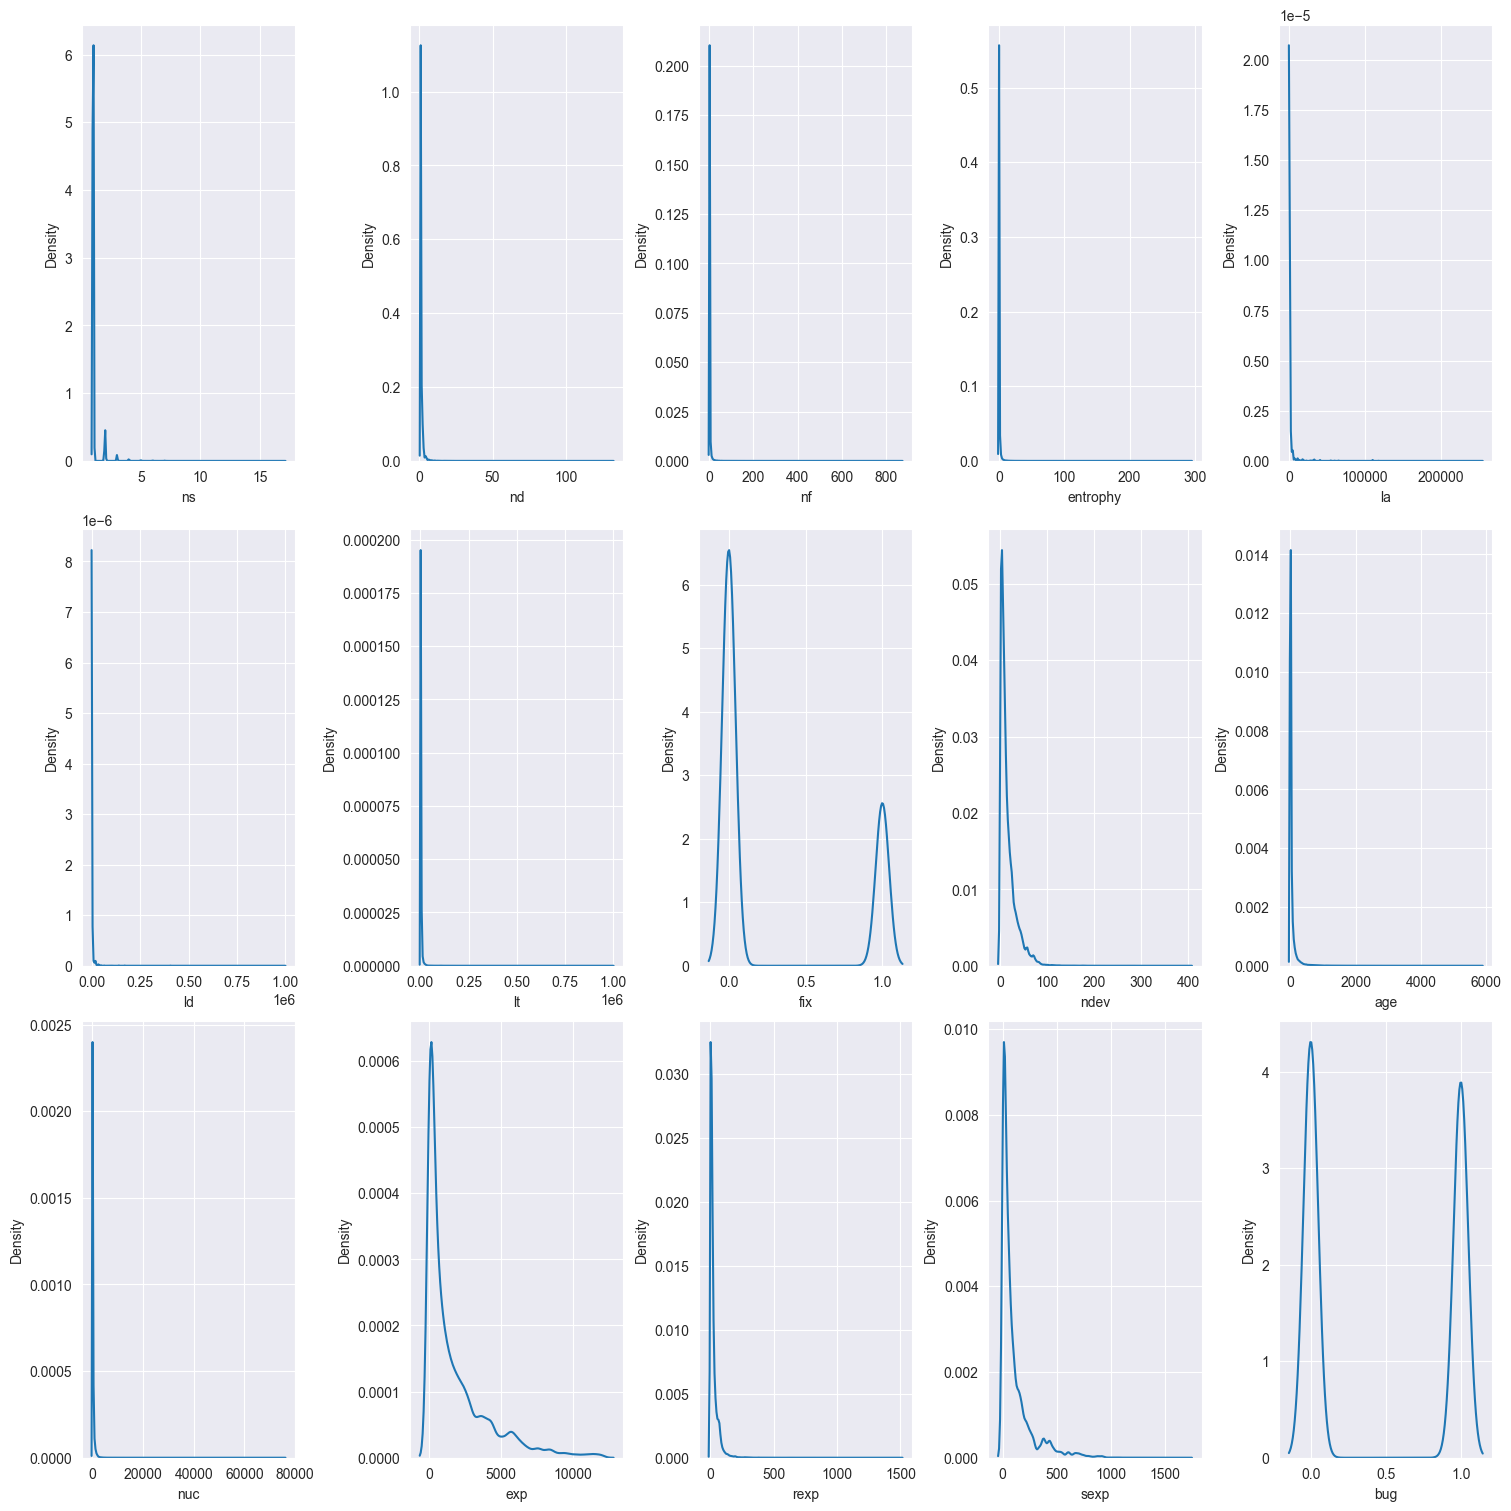

In [15]:
fig, ax = plt.subplots(3, 5, figsize =(15,15), layout = 'constrained')
sns.kdeplot(df_train['ns'], ax = ax[0, 0])

sns.kdeplot(df_train['nd'], ax = ax[0, 1])

sns.kdeplot(df_train['nf'], ax = ax[0, 2])

sns.kdeplot(df_train['entrophy'], ax = ax[0, 3])

sns.kdeplot(df_train['la'], ax = ax[0, 4])

sns.kdeplot(df_train['ld'], ax = ax[1, 0])

sns.kdeplot(df_train['lt'], ax = ax[1, 1])

sns.kdeplot(df_train['fix'], ax = ax[1, 2])

sns.kdeplot(df_train['ndev'], ax = ax[1, 3])

sns.kdeplot(df_train['age'], ax = ax[1, 4])

sns.kdeplot(df_train['nuc'], ax = ax[2, 0])

sns.kdeplot(df_train['exp'], ax = ax[2, 1])

sns.kdeplot(df_train['rexp'], ax = ax[2, 2])

sns.kdeplot(df_train['sexp'], ax = ax[2, 3])

sns.kdeplot(df_train['bug'], ax = ax[2, 4])

In [20]:
df_test.drop(df_test.columns[0:3], axis =1, inplace= True)

In [21]:
y_train = df_train['bug']
y_test = df_test['bug']
df_train.drop(['bug'], axis=1, inplace= True)
df_test.drop(['bug'], axis=1, inplace= True)
X_train = df_train
X_test = df_test

In [22]:
X_test.head()

,ns,nd,nf,entrophy,la,ld,lt,fix,ndev,age,nuc,exp,rexp,sexp
0,1,1,1,0.000000,1,1,5821,0,32,18.932535,584,5,1.001763,3
1,1,1,1,0.000000,1,1,537,1,6,26.133553,33,6327,10.526771,100
2,1,1,2,0.454451,22,8,9003,0,50,14.708356,1034,6329,12.496427,100
3,1,1,1,0.000000,2,2,803,1,3,622.676447,5,0,0.000000,1
4,1,1,2,0.526034,9,8,6933,0,67,32.442176,694,2,2.000000,3


In [23]:
pt = PowerTransformer()
pX_train = pt.fit_transform(X_train)
pX_test = pt.transform(X_test)

In [24]:
pX_train = pd.DataFrame(pX_train)
pX_train = pX_train.rename(columns={0: "ns", 1: "nd", 2: "nf", 3: "entrophy", 4: "la", 5: "ld", 6: "lt", 7: "fix", 8: "ndev", 9: "age", 10: "nuc", 11: "exp", 12: "rexp", 13: "sexp"})
pX_train.describe()

,ns,nd,nf,entrophy,la,ld,lt,fix,ndev,age,nuc,exp,rexp,sexp
count,114379.000000,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,1.143790e+05,114379.000000
mean,-0.000002,8.191811e-13,8.159820e-15,-4.323676e-17,1.242436e-16,1.401467e-16,-1.260327e-15,9.343116e-17,-3.339667e-16,-2.882451e-16,-1.709591e-16,2.146929e-16,-7.554009e-17,0.000000
std,1.000004,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004
min,-0.266882,-4.094889e-01,-6.070269e-01,-6.063925e-01,-1.949729e+00,-1.522226e+00,-4.862487e+00,-6.254067e-01,-1.779110e+00,-1.346445e+00,-2.219123e+00,-2.012489e+00,-2.225995e+00,-1.894829
25%,-0.266882,-4.094889e-01,-6.070269e-01,-6.063925e-01,-7.957304e-01,-7.237995e-01,-6.477392e-01,-6.254067e-01,-8.139984e-01,-9.600948e-01,-6.920106e-01,-7.407952e-01,-6.829431e-01,-0.702525
50%,-0.266882,-4.094889e-01,-6.070269e-01,-6.063925e-01,-8.261927e-02,-8.010438e-02,2.405982e-02,-6.254067e-01,8.641535e-03,1.414858e-04,2.863216e-02,4.379105e-02,1.983580e-02,0.041469
75%,-0.266882,-4.094889e-01,1.334039e+00,1.291042e+00,7.838449e-01,7.834767e-01,6.749494e-01,1.598960e+00,7.717221e-01,8.595364e-01,7.057679e-01,7.686669e-01,6.631598e-01,0.737605
max,3.747010,2.470009e+00,1.981652e+00,1.955417e+00,2.973674e+00,2.541460e+00,6.011093e+00,1.598960e+00,3.678010e+00,2.422798e+00,4.953533e+00,2.135616e+00,4.393590e+00,2.837998


<Axes: xlabel='sexp', ylabel='Density'>

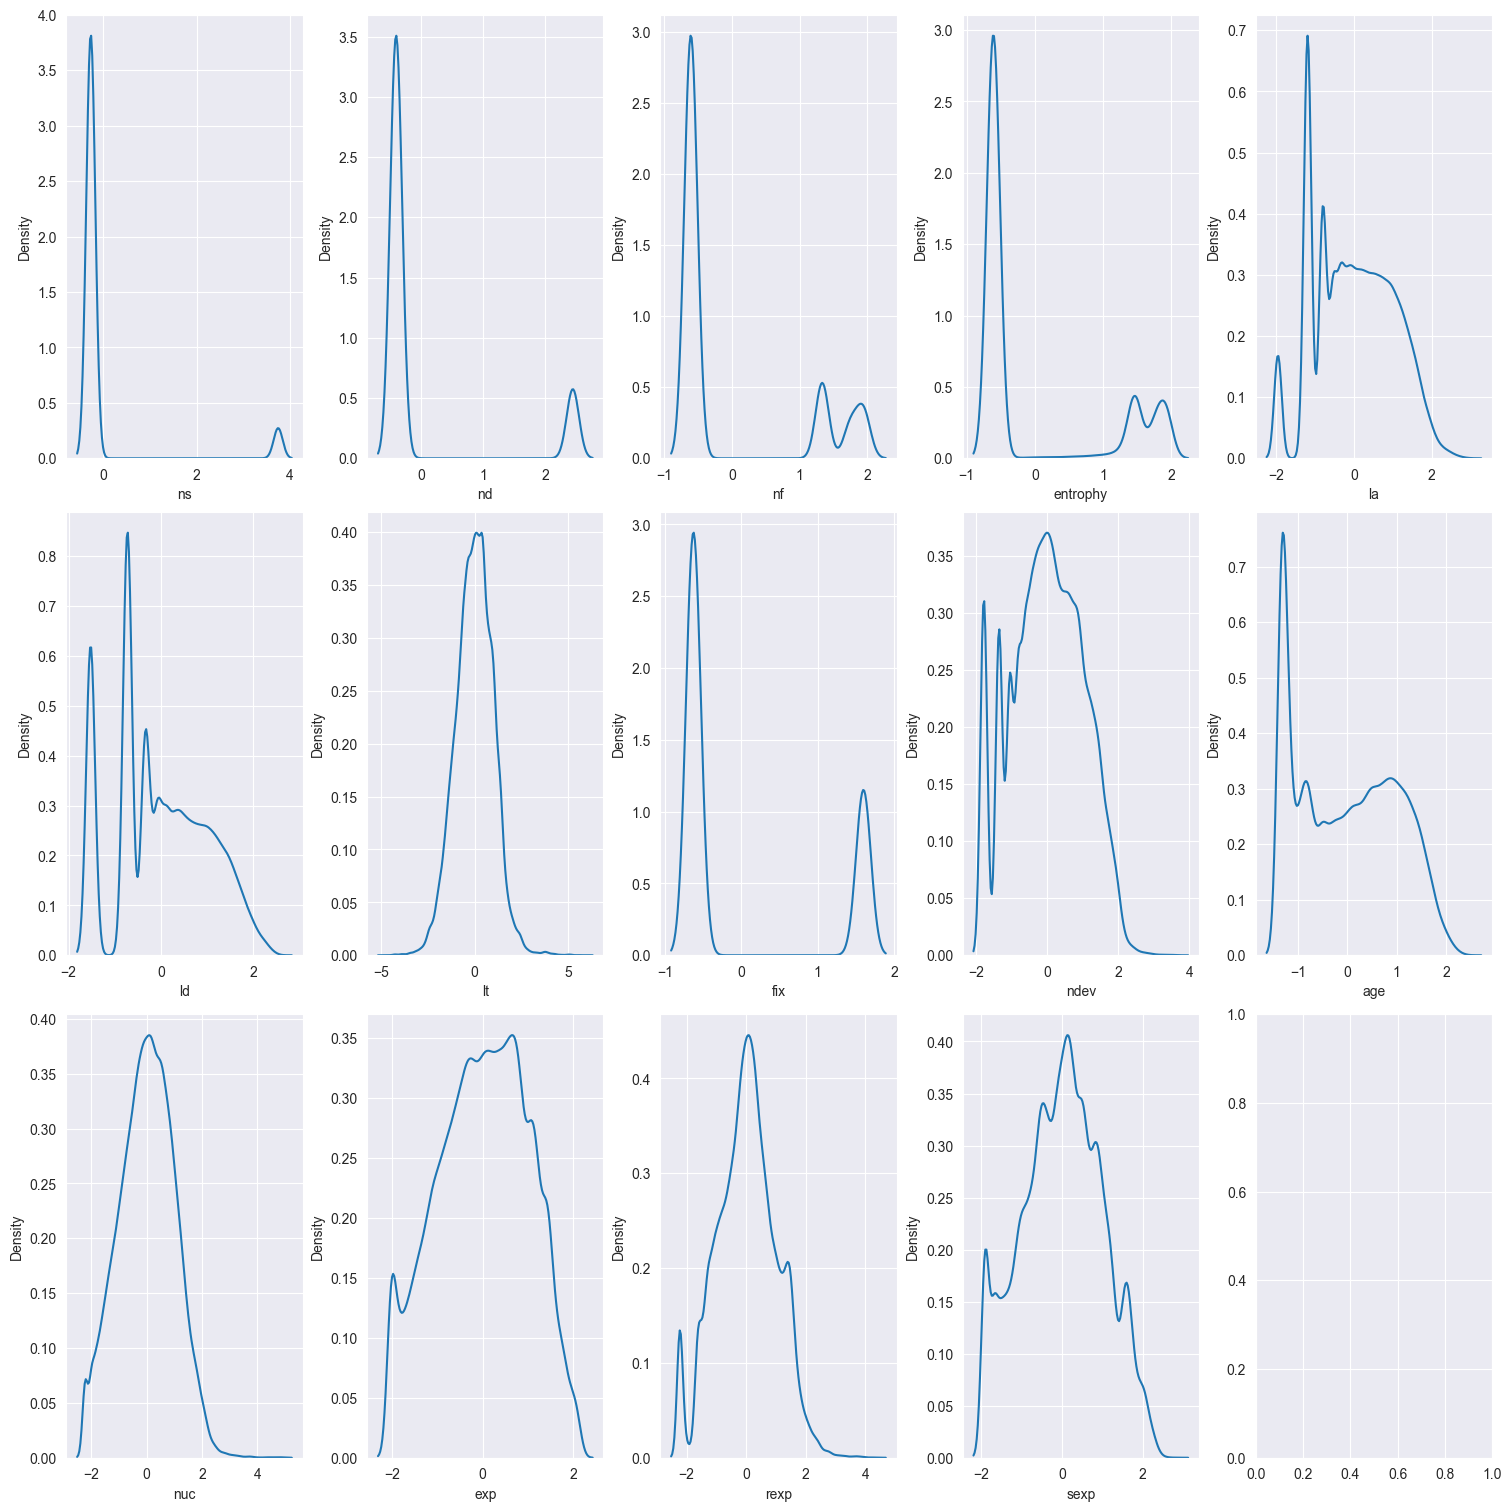

In [25]:
fig, ax = plt.subplots(3, 5, figsize = (15,15), layout = 'constrained')
sns.kdeplot(pX_train['ns'], ax = ax[0, 0])

sns.kdeplot(pX_train['nd'], ax = ax[0, 1])

sns.kdeplot(pX_train['nf'], ax = ax[0, 2])

sns.kdeplot(pX_train['entrophy'], ax = ax[0, 3])

sns.kdeplot(pX_train['la'], ax = ax[0, 4])

sns.kdeplot(pX_train['ld'], ax = ax[1, 0])

sns.kdeplot(pX_train['lt'], ax = ax[1, 1])

sns.kdeplot(pX_train['fix'], ax = ax[1, 2])

sns.kdeplot(pX_train['ndev'], ax = ax[1, 3])

sns.kdeplot(pX_train['age'], ax = ax[1, 4])

sns.kdeplot(pX_train['nuc'], ax = ax[2, 0])

sns.kdeplot(pX_train['exp'], ax = ax[2, 1])

sns.kdeplot(pX_train['rexp'], ax = ax[2, 2])

sns.kdeplot(pX_train['sexp'], ax = ax[2, 3])
